In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import biosppy.signals.ecg as ecg
import neurokit2 as nk


In [3]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')

In [4]:
X_train.loc[9]

id         9.0
x0       -69.0
x1       -72.0
x2       -75.0
x3       -78.0
          ... 
x17802     NaN
x17803     NaN
x17804     NaN
x17805     NaN
x17806     NaN
Name: 9, Length: 17808, dtype: float64

In [5]:
signal = X_train.loc[10].dropna().to_numpy(dtype='float32')

In [101]:
np.isnan(signal.any())

False

In [17]:
X_train.shape[0]

5117

In [22]:
features = []
for sample in range(X_train.shape[0]):
    signal = X_train.loc[sample].dropna().to_numpy(dtype='float32')
    df, info = nk.ecg_process(signal, sampling_rate=300)
    analyze_df = nk.ecg_analyze(df, sampling_rate=300)
    features += [analyze_df]
    

ValueError: NeuroKit error: we expect the user to provide a vector, i.e., a one-dimensional array (such as a list of values). Current input of shape: ()

In [114]:
df, info = nk.ecg_process(X_train.loc[1].dropna().to_numpy(dtype='float32'), sampling_rate=300)
analyze_df = nk.ecg_analyze(df, sampling_rate=300)

In [15]:
features_pd = pd.concat(features)
print(features_pd.shape)

(10, 73)


In [ ]:
features = pd.concat([features, analyze_df], sort=False)

In [74]:
analyze_df = nk.ecg_analyze(df, sampling_rate=300)

In [75]:
analyze_df.dropna(axis=1)

,ECG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_RMSSD,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,66.640957,900.689655,35.916341,26.5324,26.862158,0.039876,0.029458,906.666667,29.652,0.032704,...,2.397895,4.237291,1.425803,0.0,0.0,0.0,1.929675,1.732052,2.358072,1.340133


In [16]:
features

[   ECG_Rate_Mean  HRV_MeanNN   HRV_SDNN  HRV_RMSSD   HRV_SDSD  HRV_CVNN  \
 0        73.8475  815.858586  65.382662  63.711422  63.750021   0.08014   
 
    HRV_CVSD  HRV_MedianNN  HRV_MadNN  HRV_MCVNN  ...  HRV_SampEn  HRV_ShanEn  \
 0  0.078091         830.0     12.355   0.014886  ...     0.45257    4.141017   
 
    HRV_FuzzyEn  HRV_MSEn  HRV_CMSEn  HRV_RCMSEn    HRV_CD  HRV_HFD   HRV_KFD  \
 0     0.385663  0.216039    0.38092    0.355285  0.790085  1.70428  1.194765   
 
     HRV_LZC  
 0  0.457909  
 
 [1 rows x 73 columns],
    ECG_Rate_Mean  HRV_MeanNN   HRV_SDNN  HRV_RMSSD   HRV_SDSD  HRV_CVNN  \
 0      76.136918  788.380952  44.024439   26.22801  26.580558  0.055842   
 
    HRV_CVSD  HRV_MedianNN  HRV_MadNN  HRV_MCVNN  ...  HRV_SampEn  HRV_ShanEn  \
 0  0.033268    796.666667      49.42   0.062033  ...    1.704748    4.707715   
 
    HRV_FuzzyEn  HRV_MSEn  HRV_CMSEn  HRV_RCMSEn    HRV_CD   HRV_HFD   HRV_KFD  \
 0     1.133431       0.0        0.0         0.0  1.762569  1.

In [29]:
X_train.shape
X_train.loc[0]

id         0.0
x0       -13.0
x1        -9.0
x2        -6.0
x3        -4.0
          ... 
x17802     NaN
x17803     NaN
x17804     NaN
x17805     NaN
x17806     NaN
Name: 0, Length: 17808, dtype: float64

In [30]:
signal = X_train.loc[0].dropna().to_numpy(dtype='float32')
print(signal,signal.shape)

[  0. -13.  -9. ...  60.  74.  91.] (16323,)


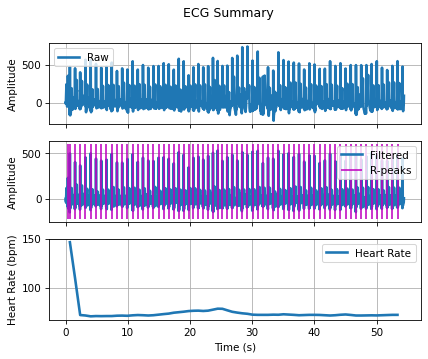

In [33]:
signal_X = X_train.loc[0].dropna().to_numpy(dtype='float32')
features = ecg.ecg(signal_X,sampling_rate=300,show=True)
ts, filtered, rpeaks_, templates_ts, templates, heart_rate_ts, heart_rate=features